In [475]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_parquet(r"../../../data/NowayKR.parquet")

In [476]:
df.shape

(10, 161)

In [477]:
df.head(15)

,gameCreation,gameEndTimestamp,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,teamId,allyTopPick,allyJunglePick,allyMiddlePick,allyBottomPick,allySupportPick,enemyTopPick,enemyJunglePick,enemyMiddlePick,enemyBottomPick,enemySupportPick,laneOpponent,allyTopBan,allyJungleBan,allyMiddleBan,allyBottomBan,allySupportBan,enemyTopBan,enemyJungleBan,enemyMiddleBan,enemyBottomBan,enemySupportBan,Maxi,Moritz,Niclas,Aaron,totalAllyTeamKills,totalAllyTeamDeaths,gold@0,gold@1,gold@2,gold@3,gold@4,gold@5,gold@6,gold@7,gold@8,gold@9,gold@10,gold@11,gold@12,gold@13,gold@14,gold@15,gold@16,gold@17,gold@18,gold@19,gold@20,gold@21,gold@22,gold@23,gold@24,gold@25,gold@26,gold@27,gold@28,gold@29,gold_diff@0,gold_diff@1,gold_diff@2,gold_diff@3,gold_diff@4,gold_diff@5,gold_diff@6,gold_diff@7,gold_diff@8,gold_diff@9,gold_diff@10,gold_diff@11,gold_diff@12,gold_diff@13,gold_diff@14,gold_diff@15,gold_diff@16,gold_diff@17,gold_diff@18,gold_diff@19,gold_diff@20,gold_diff@21,gold_diff@22,gold_diff@23,gold_diff@24,gold_diff@25,gold_diff@26,gold_diff@27,gold_diff@28,gold_diff@29,cs@0,cs@1,cs@2,cs@3,cs@4,cs@5,cs@6,cs@7,cs@8,cs@9,cs@10,cs@11,cs@12,cs@13,cs@14,cs@15,cs@16,cs@17,cs@18,cs@19,cs@20,cs@21,cs@22,cs@23,cs@24,cs@25,cs@26,cs@27,cs@28,cs@29,puuid,gold@30,gold_diff@30,cs@30,gold@31,gold@32,gold@33,gold@34,gold_diff@31,gold_diff@32,gold_diff@33,gold_diff@34,cs@31,cs@32,cs@33,cs@34,gameDuration_m_s,onBlueSide,timeBetweenGames,session
matchId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KR_6807587968,2023-11-20 19:26:01,2023-11-20 19:54:50,1711,13.22,9,3,9,Ziggs,False,False,False,False,False,False,12238,28821,887,False,MIDDLE,29708,2,11,True,100,Jayce,Elise,Ziggs,Ezreal,Bard,Gragas,LeeSin,Zoe,Jhin,Ashe,Zoe,Graves,KSante,Orianna,Pyke,Akali,Blitzcrank,Alistar,Yone,Rumble,Karthus,False,False,False,False,37,17,500,500,612,881,1218,1613,2364,2592,3097,3501,3988,4396,4699,5207,5500,5903,6534,6973.0,7291.0,7735.0,7941.0,8714.0,9144.0,9618.0,9790.0,10068.0,11282.0,11560.0,12061.0,12238.0,0,0,49,-32,28,49,464,381,501,546,757,748,311,634,514,690,854,924.0,926.0,1087.0,1087.0,1012.0,1180.0,1429.0,1289.0,1222.0,1482.0,1637.0,1926.0,1964.0,0,0,5,13,23,36,48,54,66,79,90,103,111,123,126,138,143,145.0,153.0,167.0,172.0,172.0,183.0,190.0,190.0,199.0,205.0,210.0,215.0,219.0,yHkoNLe-mR186rkynN39frLVYFq3VvaFHlBrYqZvgslFXF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28:31,True,NaT,0
KR_6807583215,2023-11-20 18:47:09,2023-11-20 19:16:49,1717,13.22,9,2,5,Rumble,False,False,False,False,False,False,11559,26340,1003,False,TOP,28668,2,13,True,100,Rumble,JarvanIV,Akali,Twitch,Bard,Akshan,Vi,Brand,Cassiopeia,Rengar,Akshan,Ziggs,Blitzcrank,KSante,Shaco,NoBan,Jax,Rell,Singed,Zed,Nautilus,False,False,False,False,37,22,500,500,584,888,1165,1518,2074,2500,2832,3144,3434,3905,4215,4755,5231,5808,6370,6492.0,6972.0,7169.0,7565.0,7687.0,7835.0,8483.0,9101.0,9677.0,10141.0,10441.0,11264.0,11559.0,0,0,0,-28,-63,49,271,435,373,273,273,364,301,670,918,973,578,121.0,406.0,411.0,516.0,135.0,-139.0,-39.0,300.0,600.0,832.0,1010.0,1710.0,1929.0,0,0,3,14,23,33,41,56,68,79,89,106,113,123,133,139,148,148.0,152.0,156.0,168.0,168.0,169.0,175.0,183.0,188.0,190.0,193.0,193.0,195.0,yHkoNLe-mR186rkynN39frLVYFq3VvaFHlBrYqZvgslFXF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28:37,True,0 days 00:09:12,0
KR_6807566419,2023-11-20 18:19:01,2023-11-20 18:40:40,1284,13.22,5,3,4,Xerath,True,False,False,False,False,True,9340,10785,543,False,MIDDLE,11640,1,10,True,200,Gwen,LeeSin,Xerath,Varus,Ashe,KSante,Graves,Syndra,Jhin,Pyke,Syndra,Kaisa,NoBan,Jax,Talon,Kalista,Taliyah,Karthus,Blitzcrank,Ja

#### Percentage of Roles

<Axes: xlabel='teamPosition'>

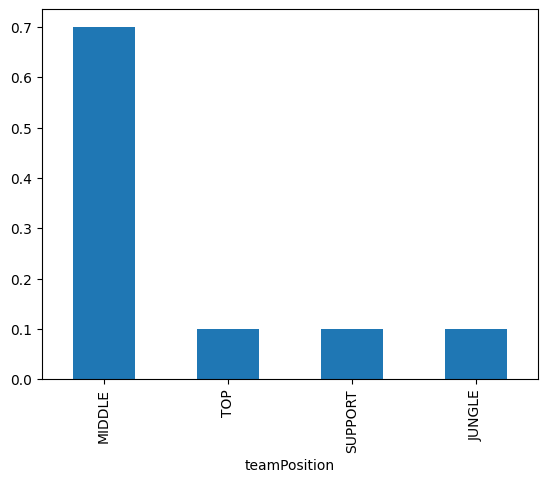

In [478]:
df["teamPosition"].value_counts(normalize=True).plot(kind="bar")

#### Percentage of Mid lane Champions

<Axes: ylabel='championName'>

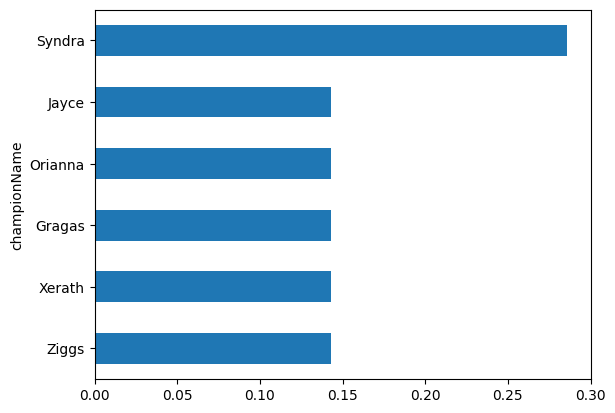

In [479]:
filt = df["teamPosition"] == "MIDDLE"
df.loc[filt, "championName"].value_counts(normalize=True).sort_values().plot(kind="barh")

In [480]:
# df.loc[filt, "championName"].value_counts(normalize=True).head(7).index
df.loc[filt, "championName"].value_counts(normalize=True)

championName
Syndra     0.285714
Ziggs      0.142857
Xerath     0.142857
Gragas     0.142857
Orianna    0.142857
Jayce      0.142857
Name: proportion, dtype: float64

#### Get Top 5 % pickrate champions

In [481]:
# Calculate the normalized value counts for championName
value_counts_normalized = df['championName'].value_counts(normalize=True)

# Define a percentage threshold
percentage_threshold = 0.05

# Filter champion names with a percentage greater than the threshold
selected_champions = value_counts_normalized[value_counts_normalized > percentage_threshold].index
selected_champions

Index(['Gragas', 'Syndra', 'Ziggs', 'Rumble', 'Xerath', 'Alistar', 'Orianna',
       'Jayce'],
      dtype='object', name='championName')

<Axes: xlabel='championName'>

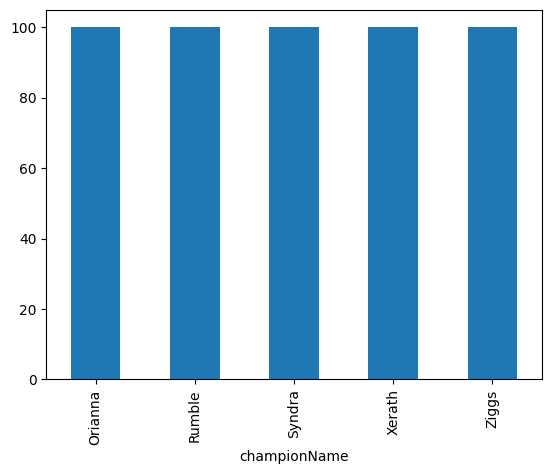

In [482]:
filt = df["championName"].isin(selected_champions)
win_rates = df.loc[filt].groupby("championName")["win"].value_counts(normalize=True, sort=True)[:, True] * 100
win_rates.plot(kind="bar")

#### Most Midlane opponents

<Axes: ylabel='laneOpponent'>

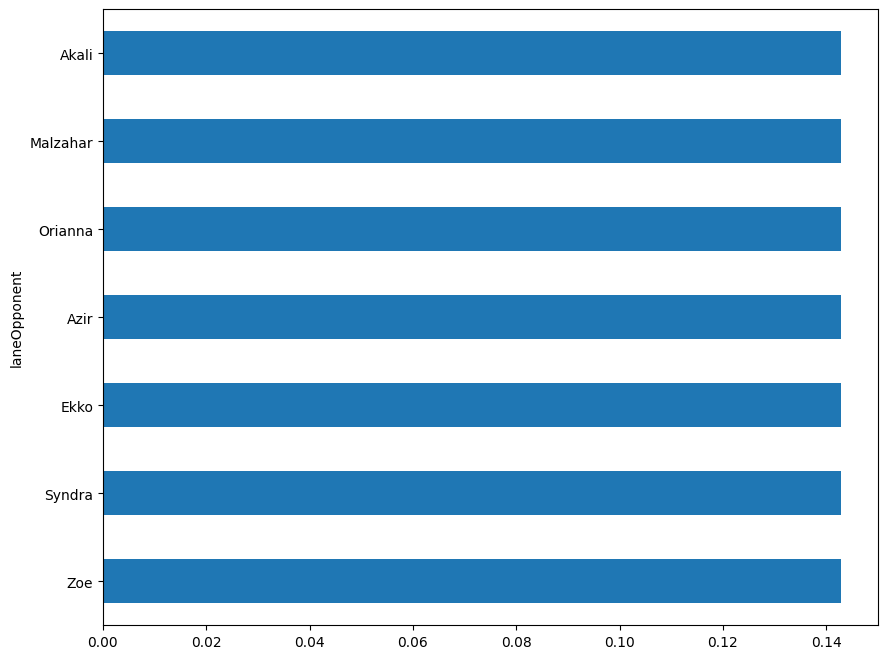

In [483]:
filt = df["teamPosition"] == "MIDDLE"
df.loc[filt, "laneOpponent"].value_counts(normalize=True).sort_values().plot(kind="barh", figsize=(10, 8))

In [484]:
# Calculate the normalized value counts for championName
value_counts_normalized = df.loc[filt, "laneOpponent"].value_counts(normalize=True)

# Define a percentage threshold
percentage_threshold = 0.05

# Filter lane opponents names with a percentage greater than the threshold
selected_lane_opponents = value_counts_normalized[value_counts_normalized > percentage_threshold].index
selected_lane_opponents

Index(['Zoe', 'Syndra', 'Ekko', 'Azir', 'Orianna', 'Malzahar', 'Akali'], dtype='object', name='laneOpponent')

#### Winrate against the opponent champions in midlane with playrate >= 5 %

<Axes: xlabel='laneOpponent'>

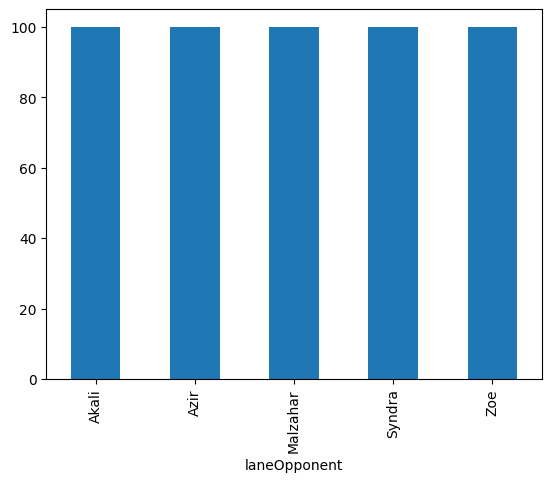

In [485]:
filt = df["laneOpponent"].isin(selected_lane_opponents)
win_rates_against = df.loc[filt].groupby("laneOpponent")["win"].value_counts(normalize=True, sort=True)[:, True] * 100
win_rates_against.plot(kind="bar")

#### Winrate for each lane

<Axes: xlabel='teamPosition'>

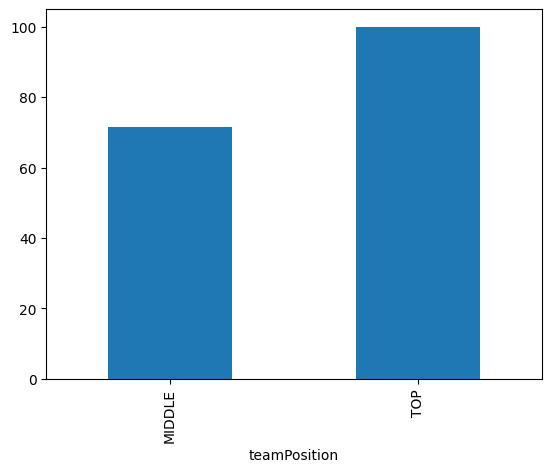

In [486]:
(df.groupby("teamPosition")["win"].value_counts(normalize=True)[:, True] * 100).plot(kind="bar")

#### winrates with champion in own team

* maybe change data frame that allyRolePick is NaN when teamPosition == Role

In [487]:
# Use melt to reshape the DataFrame into a long format
melted_df = pd.melt(df, value_vars=["allyTopPick", "allyJunglePick", "allyMiddlePick", "allyBottomPick", "allySupportPick"])

# Calculate value counts for the melted DataFrame
value_counts_result = melted_df['value'].value_counts()

print("Combined Value Counts:")
value_counts_result


Combined Value Counts:


value
Gragas        4
LeeSin        3
Renata        3
Jayce         2
Syndra        2
Ashe          2
Akali         2
Kaisa         2
Bard          2
Fiora         2
Jax           2
Alistar       1
Twitch        1
Jhin          1
Kalista       1
Senna         1
Cassiopeia    1
Jinx          1
Lissandra     1
Varus         1
Orianna       1
Ezreal        1
Zed           1
Rumble        1
Xerath        1
Ziggs         1
Taliyah       1
Vi            1
Belveth       1
Talon         1
JarvanIV      1
Elise         1
KSante        1
Gwen          1
Rell          1
Name: count, dtype: int64

#### Winrate on blue side

<Axes: xlabel='teamId'>

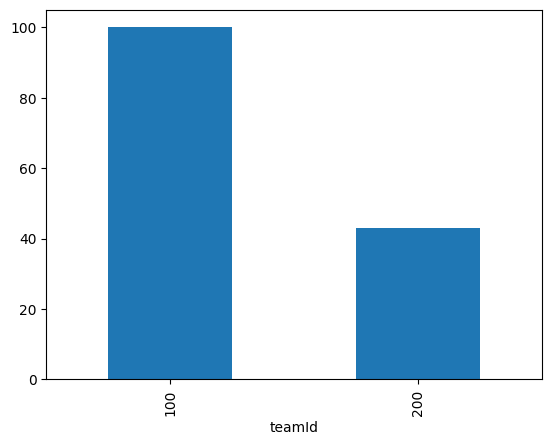

In [488]:
(df.groupby("teamId")["win"].value_counts(normalize=True)[:, True] * 100).plot(kind="bar")

#### Gold earn in wins

In [489]:
import matplotlib.pyplot as plt

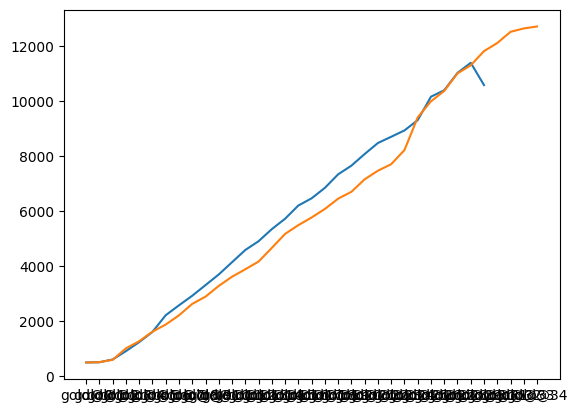

In [490]:
filt = df["win"]
df_wins  = df.loc[filt]

# Calculate the mean for the "gold" columns in the wins DataFrame
mean_gold_wins = df_wins.filter(like='gold@').mean(axis=0)

plt.plot(mean_gold_wins)

df_wins  = df.loc[~filt]

# Calculate the mean for the "gold" columns in the wins DataFrame
mean_gold_wins = df_wins.filter(like='gold@').mean(axis=0)

plt.plot(mean_gold_wins)

plt.show()

#### Gold diff to lane opponent in wins and loses

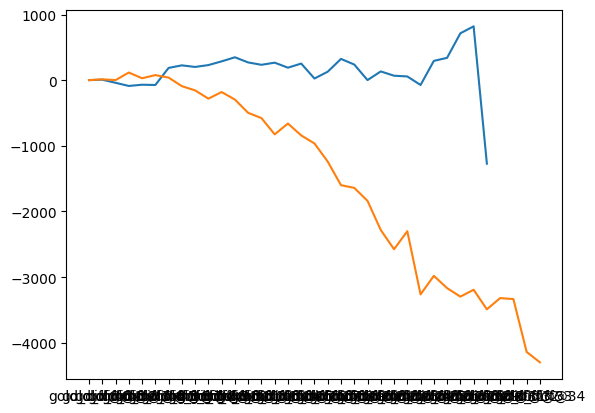

In [491]:
filt = df["win"]
df_wins  = df.loc[filt]

mean_gold_diff_wins = df_wins.filter(like='gold_diff@').mean(axis=0)
plt.plot(mean_gold_diff_wins)

df_loses  = df.loc[~filt]

mean_gold_diff_loses = df_loses.filter(like='gold_diff@').mean(axis=0)

plt.plot(mean_gold_diff_loses)

plt.show()

#### Average amount of Games per Session

<Axes: xlabel='session'>

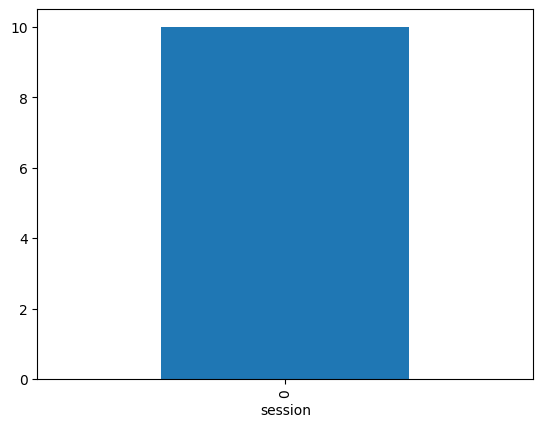

In [492]:
df["session"].value_counts(sort=False).plot(kind="bar")

#### Most banned Champion by Noway

* change to championName, championBanned: teamPosition == Middle -> allyMiddlePick = NaN

In [493]:
for role in df["teamPosition"].str.capitalize().values:
    print(df[f"ally{role}Ban"])

matchId
KR_6807587968    Orianna
KR_6807583215     KSante
KR_6807566419        Jax
KR_6807549124     Graves
KR_6807525202     Rumble
KR_6807491827       Kled
KR_6807457805       Yone
KR_6807436448    Karthus
KR_6807369915     Graves
KR_6807292160      Ziggs
Name: allyMiddleBan, dtype: object
matchId
KR_6807587968     Graves
KR_6807583215      Ziggs
KR_6807566419      Kaisa
KR_6807549124     KSante
KR_6807525202       Pyke
KR_6807491827     Kennen
KR_6807457805     Rengar
KR_6807436448     Rumble
KR_6807369915    Kalista
KR_6807292160     Draven
Name: allyTopBan, dtype: object
matchId
KR_6807587968    Orianna
KR_6807583215     KSante
KR_6807566419        Jax
KR_6807549124     Graves
KR_6807525202     Rumble
KR_6807491827       Kled
KR_6807457805       Yone
KR_6807436448    Karthus
KR_6807369915     Graves
KR_6807292160      Ziggs
Name: allyMiddleBan, dtype: object
matchId
KR_6807587968         Akali
KR_6807583215         NoBan
KR_6807566419       Kalista
KR_6807549124         Rakan
KR_6

#### Most played mid lane champion match ups

<Axes: ylabel='laneOpponent'>

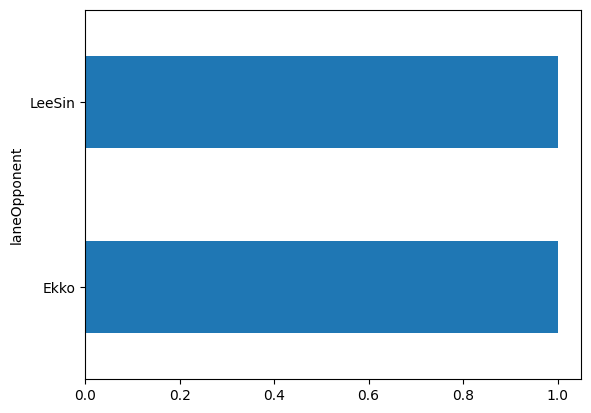

In [494]:
most_played_champion = df["championName"].value_counts().head(1).index.item()

filt = df["championName"] == most_played_champion
df.loc[filt, "laneOpponent"].value_counts().sort_values().plot(kind="barh")

#### most played against

<Axes: ylabel='laneOpponent'>

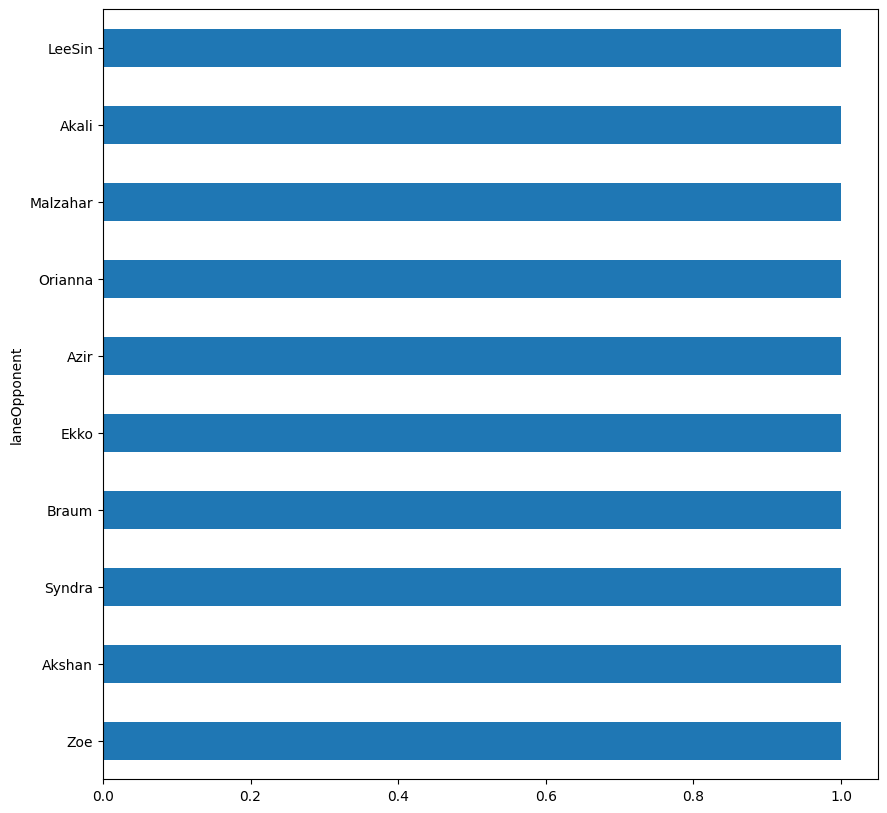

In [495]:
df["laneOpponent"].value_counts().sort_values().plot(kind="barh", figsize=(10, 10))

#### most picked enemy champion

In [496]:
melted_df = pd.melt(df, value_vars=["enemyTopPick", "enemyJunglePick", "enemyMiddlePick", "enemyBottomPick", "enemySupportPick"])

# Calculate value counts for the melted DataFrame
value_counts_result = melted_df['value'].value_counts()

print("Combined Value Counts:")
value_counts_result

Combined Value Counts:


value
LeeSin        3
Taliyah       2
Orianna       2
KSante        2
Aatrox        2
Xayah         2
Tristana      2
Bard          2
Graves        2
Jhin          2
Zeri          1
Lucian        1
Draven        1
Ashe          1
Gragas        1
Rengar        1
Pyke          1
Braum         1
Rell          1
Alistar       1
Rakan         1
Cassiopeia    1
Ekko          1
Akali         1
Malzahar      1
Azir          1
Akshan        1
Galio         1
Syndra        1
Brand         1
Zoe           1
Kindred       1
Talon         1
Vi            1
Illaoi        1
Jax           1
Garen         1
Rumble        1
Nautilus      1
Name: count, dtype: int64

#### champion combinations

* Mid / Jungle

<Axes: ylabel='enemyJunglePick,enemyMiddlePick'>

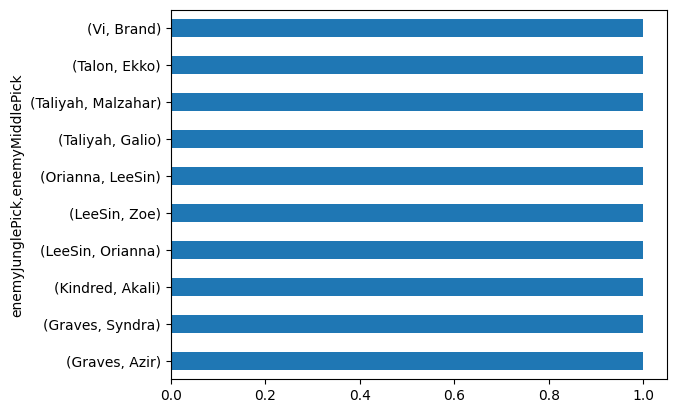

In [497]:
df[["enemyJunglePick", "enemyMiddlePick"]].value_counts().head(10).sort_values().plot(kind="barh")

<Axes: ylabel='allyJunglePick,allyMiddlePick'>

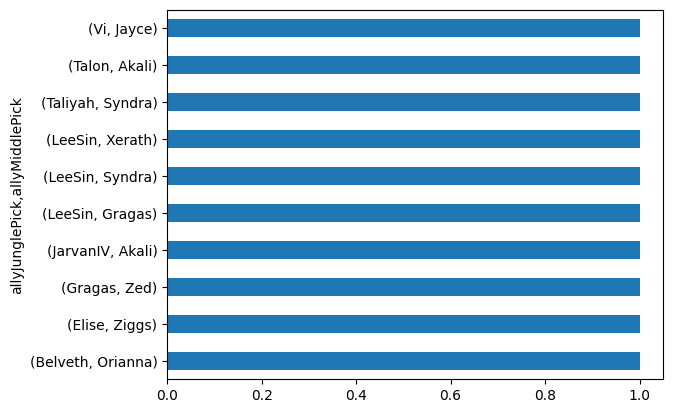

In [498]:
df[["allyJunglePick", "allyMiddlePick"]].value_counts().head(10).sort_values().plot(kind="barh")

* Bottom / Support

<Axes: ylabel='enemyBottomPick,enemySupportPick'>

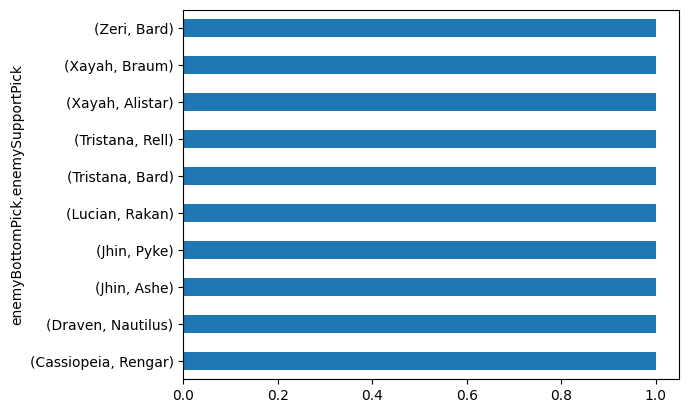

In [499]:
df[["enemyBottomPick", "enemySupportPick"]].value_counts().head(10).sort_values().plot(kind="barh")

<Axes: ylabel='allyBottomPick,allySupportPick'>

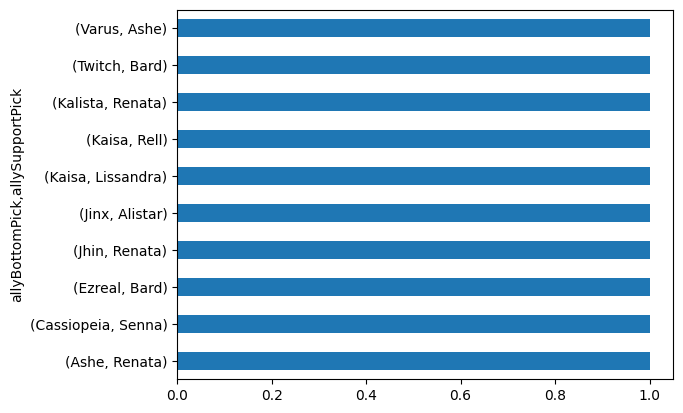

In [500]:
df[["allyBottomPick", "allySupportPick"]].value_counts().head(10).sort_values().plot(kind="barh")

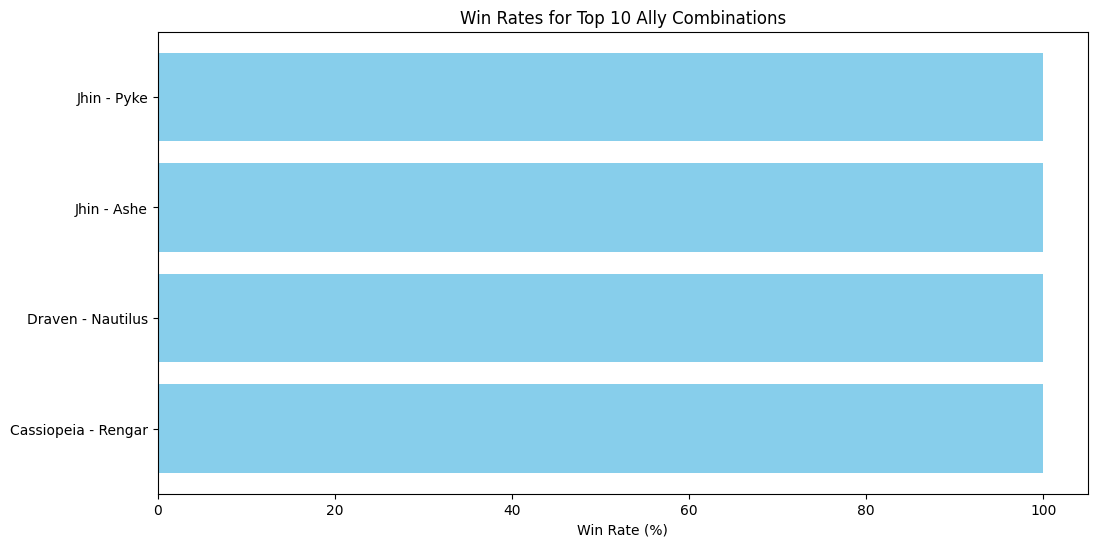

In [501]:
top_combinations = df[["enemyBottomPick", "enemySupportPick"]].value_counts().head(4)

# Initialize lists to store data for plotting
bottom_support_combinations = []
win_rates = []


for bottom, support in top_combinations.index:
    filt = (df["enemyBottomPick"] == bottom) & (df["enemySupportPick"] == support)
    win_rate = df.loc[filt, "win"].mean() * 100
    win_rate = win_rate if not pd.isna(win_rate) else 0

    bottom_support_combinations.append(f"{bottom} - {support}")
    win_rates.append(win_rate)


# Sort combinations by win rate
sorted_combinations = sorted(zip(bottom_support_combinations, win_rates), key=lambda x: x[1], reverse=False)

# Unpack the sorted pairs
sorted_combinations, sorted_win_rates = zip(*sorted_combinations)

# Plot all combinations in a single horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(sorted_combinations, sorted_win_rates, color='skyblue')
plt.xlabel('Win Rate (%)')
plt.title('Win Rates for Top 10 Ally Combinations')
plt.show()

In [502]:
filt = (df["enemyBottomPick"] == "Xayah") & (df["enemySupportPick"] == "Nautilus")
df.loc[filt, "win"]

Series([], Name: win, dtype: bool)

#### Average kills per game (both teams)

In [503]:
average_kills_per_game = (df["totalAllyTeamKills"] + df["totalAllyTeamDeaths"]).sum() / df.shape[0]
f"Average kills per game: {average_kills_per_game}"

'Average kills per game: 48.6'

#### Average kills per Minute

In [504]:
average_game_time_s = df["gameDuration"].sum() / df.shape[0]
average_kills_per_minute = average_kills_per_game / (average_game_time_s / 60)
f"Average kills per minute: {average_kills_per_minute}"

'Average kills per minute: 1.9330460722572094'

#### Winrate when first tower killed by noway

In [505]:
filt = (df["firstTowerKill"] == True) | (df["firstTowerAssist"] == True)
df.loc[filt, "win"].mean() * 100

nan

#### Winrate when first blood by noway

In [506]:
filt = (df["firstBloodKill"] == True) | (df["firstBloodAssist"] == True)
df.loc[filt, "win"].mean() * 100

50.0

#### Percentage of games on blue side

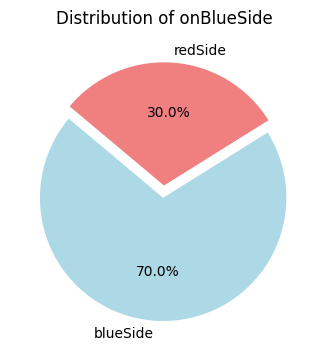

In [507]:
# Plotting the pie chart
plt.figure(figsize=(4, 4))
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # To emphasize the first slice
labels = ["blueSide", "redSide"] # df["onBlueSide"].value_counts().index
sizes = df["onBlueSide"].value_counts(normalize=True) * 100

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of onBlueSide')
plt.show()

#### Game time distribution

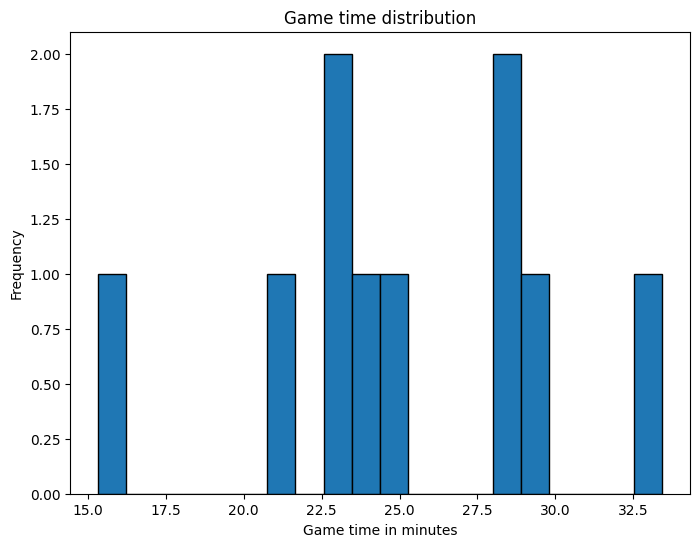

In [508]:
data = df["gameDuration"] / 60

# Plotting a histogram with bins
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Game time in minutes')
plt.ylabel('Frequency')
plt.title('Game time distribution')
plt.show()

#### correlation between deaths and win rate

In [515]:
(df.groupby("deaths")["win"].value_counts(normalize=True)[:, True] * 100)

deaths  win  
2       True     1.0
3       True     1.0
4       True     1.0
5       False    1.0
6       False    1.0
7       False    1.0
9       True     1.0
Name: proportion, dtype: float64

<Axes: xlabel='deaths'>

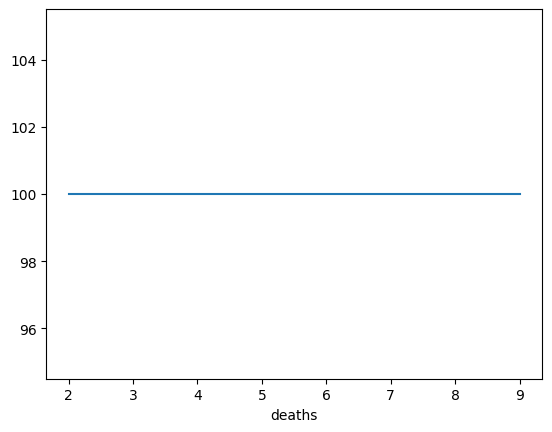

In [511]:
(df.groupby("deaths")["win"].value_counts(normalize=True)[:, True] * 100).plot()